## Plot the emittance growth rate vs tune spread vs noise in the presence of beam-beam kick.
- The simulation code is ran 3 times to imporve the accuracy, with different seeds of random numbers where they appear (eg ζ at the white noise kick and the initial particle distributions. 
- The emittance growth is averaged ovr turns and the variance is estimated. 

### Test that you have acces to the /afs directory where your data are stored
If permision denied
- $USERNAME@CERN.CH 
- aklog

In [1]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from math import *
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

### Plotting parameters

In [36]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8.5, 7),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Compute emittance

In [4]:
# #--- <x^2> ---
def mean2(numb):
    return np.mean( (numb - np.mean(numb))**2 )

# #--- <xx'> ---
def mean3(numbx , numbpx):
    return np.mean( (numbx - np.mean(numbx)) * (numbpx - np.mean(numbpx)) )

# #--- sqrt(<x^2> * <px^2> - <xx'>^2) --- compute statistical emittance
def cmp_emit(position, angle):
    return  np.sqrt(mean2(position) * mean2(angle) - mean3(position,angle)**2) # geometrical emittance

### Import the parameters of the study

In [6]:
data = {}
with open('./configuration_files/config_rate_vs_small_BB_vs_noise.json', "r") as read_file:
        data = json.load(read_file)
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'

### Loop over delta values and the three versions

In [8]:
xi_list = np.geomspace(1e-2, 0.5, 10) #the real deltas values, as the ones in the names are shorted
print(xi_list)
versions = [1, 2, 3]
Deltas_list = [0.025, 0.05, 0.1]  

[0.01       0.01544452 0.02385332 0.03684031 0.0568981  0.08787639
 0.13572088 0.2096144  0.3237394  0.5       ]


### Loop over studies. Dictionaries to store the emittance values over turns, 1 dictionay for each version, 1 for each value of delta

In [9]:
ex_dictionary = {}
for version in versions:
    ex_dictionary['v{}'.format(version)] = {}
    for Delta in Deltas_list:
        ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] = {}
        for xi in xi_list:
            print(version, Delta,xi)
            ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)] = []
            df = pd.read_pickle(my_afs_path+'Qx62.78_ksi{:.3f}_g0.200_delta{:.3f}_betax115.75_particles15000_turns1000_v{}.pkl'.format(xi, Delta, version))
            for turn in range(data['study_parameters']['turns']):
                ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)].append(cmp_emit(df.at[turn, 'x']/sqrt(data['machine_parameters']['beta_x']), df.at[turn, 'px']*sqrt(data['machine_parameters']['beta_x'] )))

1 0.025 0.01
1 0.025 0.01544452104946379
1 0.025 0.023853323044733008
1 0.025 0.03684031498640387
1 0.025 0.05689810202763908
1 0.025 0.08787639344404101
1 0.025 0.13572088082974532
1 0.025 0.20961440008267682
1 0.025 0.32373940143476265
1 0.025 0.5
1 0.05 0.01
1 0.05 0.01544452104946379
1 0.05 0.023853323044733008
1 0.05 0.03684031498640387
1 0.05 0.05689810202763908
1 0.05 0.08787639344404101
1 0.05 0.13572088082974532
1 0.05 0.20961440008267682
1 0.05 0.32373940143476265
1 0.05 0.5
1 0.1 0.01
1 0.1 0.01544452104946379
1 0.1 0.023853323044733008
1 0.1 0.03684031498640387
1 0.1 0.05689810202763908
1 0.1 0.08787639344404101
1 0.1 0.13572088082974532
1 0.1 0.20961440008267682
1 0.1 0.32373940143476265
1 0.1 0.5
2 0.025 0.01
2 0.025 0.01544452104946379
2 0.025 0.023853323044733008
2 0.025 0.03684031498640387
2 0.025 0.05689810202763908
2 0.025 0.08787639344404101
2 0.025 0.13572088082974532
2 0.025 0.20961440008267682
2 0.025 0.32373940143476265
2 0.025 0.5
2 0.05 0.01
2 0.05 0.015444521

### Plot the geometric emittance evolution over a range of $\xi$ values, for one run (aka version) and for one value of $\Delta$

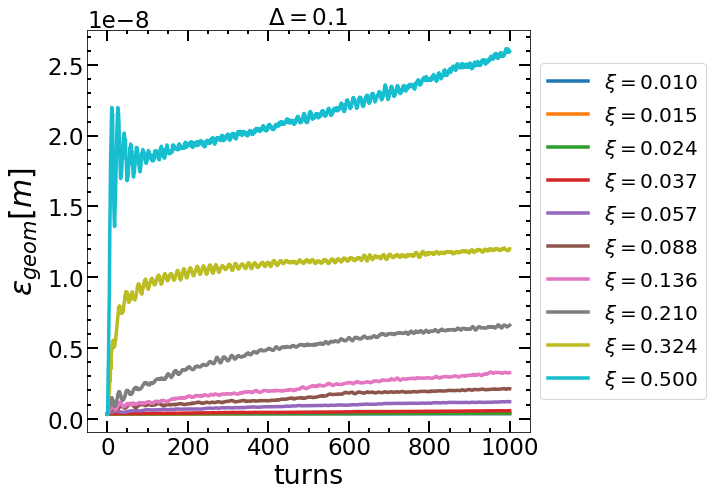

In [118]:
Delta_test = 0.1
version_test = 1
turns_list = np.arange(0, data['study_parameters']['turns'])
fig, ax = plt.subplots(1,1,figsize=(10,7))

for xi in xi_list:
    current_study =  ex_dictionary['v{}'.format(version_test)]['Delta{}'.format(Delta_test)]['xi{}'.format(xi)]
    ax.plot(turns_list, current_study, label = r'$\xi={:.3f}$'.format(xi), linewidth = 3.5)
ax.set_title(r'$\Delta={}$'.format(Delta_test))

ax.set_xlabel('turns')
ax.set_ylabel(r'$\epsilon_{geom}  [m]$', fontsize = 30)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 


# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)



# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')
#plt.legend()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

savefig = False
if savefig: 
    plt.savefig('./figures/emittance_evolution_Qx62.78_ksiScansmall_g0.200_delta{:.3f}_betax115.75_particles15000_turns1000_v1.png'.format(Delta_test))

### Plot rate vs noise strength vs version
- The color code indicate different versions
- Do a linear fit on the emittance values for each value of Delta, to obtain the emittance growth rate.
- The rate for each vale and run/version is also saved for future use

Text(0, 0.5, '$\\frac{1}{\\epsilon_0} \\frac{d\\epsilon}{dn}$')

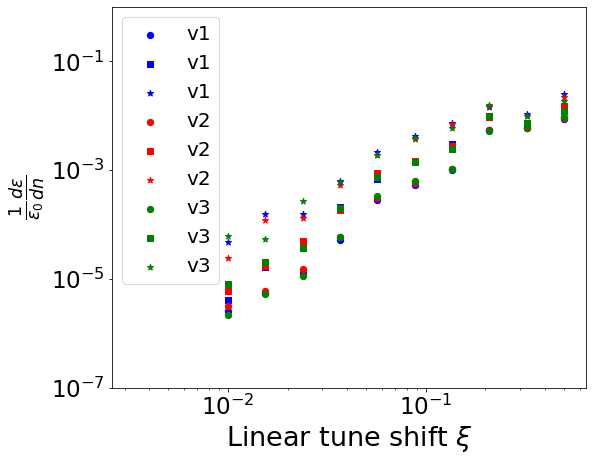

In [68]:
fig, ax = plt.subplots()
turns_list = np.arange(0, data['study_parameters']['turns'])

colors = ['b', 'r', 'g']
markers = ['o', 's', '*']
color_pointer = 0

rate_dictionary = {} # this dicitonary stores the emittance growth rate for every noise (Delta) value for each one of the different runs (versions)
for version in versions:
    rate_dictionary['v{}'.format(version)] = {}
    for Delta in Deltas_list:
        rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)] = {}
        for xi in xi_list:
            rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)] = []


for version in versions:
    for xi in xi_list:
        for index, Delta in enumerate(Deltas_list):
            
        # remove the first 200 turns from emittance_x dictionary
            current_study =  ex_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)][0:]
            # Do the linear fit
            [m_h,b_h], cov_h = np.polyfit(turns_list[0:], current_study/current_study[0], 1, cov= True)
            err_h = np.sqrt(np.diag(cov_h))
            rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)].append(m_h)
            if xi == xi_list[0]:
                ax.scatter(xi, m_h, s=40, c = colors[color_pointer], marker = markers[index], label = 'v{}'.format(version))
            else:
                ax.scatter(xi, m_h, s=40, c = colors[color_pointer], marker = markers[index])
    color_pointer = color_pointer+1
plt.legend()
ax.set_ylim(10e-8, 10e-1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Linear tune shift '+r'$\xi$')
ax.set_ylabel(r'$\frac{1}{\epsilon_0} \frac{d\epsilon}{dn}$', fontsize = 25)

### Plot rate vs noise vs theoretical rate + error bars
- add error bars, standard error $\sigma_x$

\begin{equation}
\sigma_x = \frac{\sigma}{\sqrt{n}}
\end{equation}
, where $\sigma$ is the standard deviation of the population and $n$ the number of observations of the sample

2.413300377914945e-07
2.0833983594307733e-07
9.55393119422477e-07
2.2770745967109083e-06
1.3600457170999884e-05
2.417953276715049e-05
1.536586483522891e-05
3.5155493053513183e-05
2.8325754538762834e-05
0.00018992420019070863
theory rate [2.34375e-06, 5.590622588609299e-06, 1.3335492662727908e-05, 3.180958144447156e-05, 7.587642221127248e-05, 0.00018099048104840376, 0.00043172244124692024, 0.0010298014856723555, 0.002456418750968869, 0.005859375]
9.352237051791627e-07
1.1136456278723783e-06
3.4102865282369367e-06
5.32194134666506e-06
4.540532561227546e-05
1.5725347780731747e-05
0.0001352151583271256
8.585855355752763e-05
0.00013857914055113744
0.0008672219887554298
theory rate [9.375e-06, 2.2362490354437197e-05, 5.334197065091163e-05, 0.00012723832577788625, 0.00030350568884508994, 0.000723961924193615, 0.001726889764987681, 0.004119205942689422, 0.009825675003875475, 0.0234375]
9.146983224575718e-06
2.4362133315199234e-05
3.663719986593201e-05
2.4813444162473244e-05
6.831162775092434e-

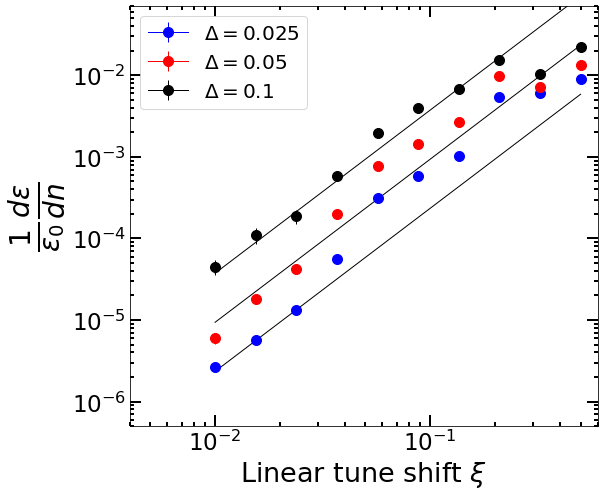

In [70]:
fig, ax = plt.subplots()
turns_list = np.arange(0, data['study_parameters']['turns'])

colors = ['b', 'r', 'k']
A = 3. # for this case, maybe you should obtain it from a fit. Lebdev P.170

for delta_index, Delta in enumerate(Deltas_list):
    #c1 = next(colors)
    theory_rate = [] # list to store the theory rate for each values of xi. 0 for every teration over Delta
    for index, xi in enumerate(xi_list):
        current_version_rate = [] # the rate for this study, you need to store them in a list to calculate the average and the standard deviation
        for version in versions:
               current_version_rate.append(rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)][0])
        # Calculate average and variance
        average_rate = np.mean(current_version_rate)
        standard_error = np.std(current_version_rate)/sqrt(len(versions))
        print(standard_error)
        if xi == xi_list[0]:
            #ax.scatter(Deltas_list_real[index], average_rate , s=40, c = 'r')
            ax.errorbar(xi, average_rate, yerr=standard_error, c=colors[delta_index], marker ='o', ms =10, label=r'$\Delta={}$'.format(Delta))
        else:
            ax.errorbar(xi, average_rate, yerr=standard_error, c=colors[delta_index], marker ='o', ms =10, label = '')

        #if xi <= data['Feedback']['values_limits']['max'] :
        theory_rate.append(A*((xi**2)*((Delta**2))/(2*data['Feedback']['values_limits']['max']**2)))
        
    # Plot theoretical rate
    ax.plot(xi_list[0:len(theory_rate)], theory_rate, c = 'K') 
    print('theory rate', theory_rate)

#plt.axvline(x=0.03, linestyle = '--', c = 'k', label=r'$\xi={}$'.format(0.03))   


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Linear tune shift '+r'$\xi$')
ax.set_ylabel(r'$\frac{1}{\epsilon_0} \frac{d\epsilon}{dn}$', fontsize = 40)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)


# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')


plt.xlim(4e-3, 0.6)
plt.ylim(5e-7, 7e-2)
savefig = True
plt.legend()
plt.tight_layout()
if savefig: 
    plt.savefig('./figures/rate_vs_noise_vs_BB_Qx62.78_ksiScan_g0.200_deltaScan_betax115.75_particles15000_turns1000_fitall.png')

### Plot with Lebedev format

2.413300377914945e-07
2.0833983594307733e-07
9.55393119422477e-07
2.2770745967109083e-06
1.3600457170999884e-05
2.417953276715049e-05
1.536586483522891e-05
3.5155493053513183e-05
2.8325754538762834e-05
0.00018992420019070863
theory rate [2.34375e-06, 5.590622588609299e-06, 1.3335492662727908e-05, 3.180958144447156e-05, 7.587642221127248e-05, 0.00018099048104840376, 0.00043172244124692024, 0.0010298014856723555, 0.002456418750968869, 0.005859375]
9.352237051791627e-07
1.1136456278723783e-06
3.4102865282369367e-06
5.32194134666506e-06
4.540532561227546e-05
1.5725347780731747e-05
0.0001352151583271256
8.585855355752763e-05
0.00013857914055113744
0.0008672219887554298
theory rate [9.375e-06, 2.2362490354437197e-05, 5.334197065091163e-05, 0.00012723832577788625, 0.00030350568884508994, 0.000723961924193615, 0.001726889764987681, 0.004119205942689422, 0.009825675003875475, 0.0234375]
9.146983224575718e-06
2.4362133315199234e-05
3.663719986593201e-05
2.4813444162473244e-05
6.831162775092434e-

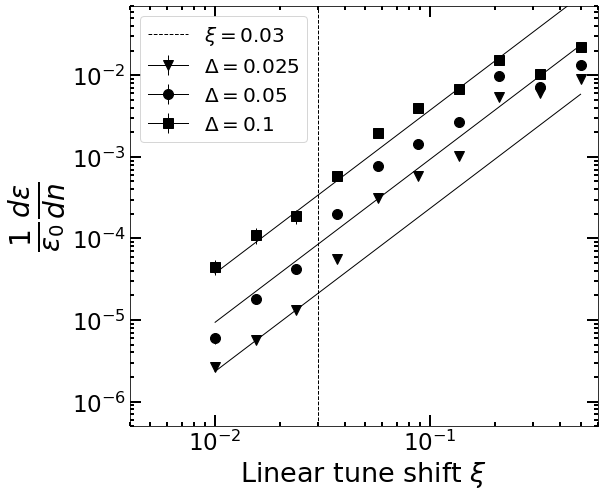

In [72]:
fig, ax = plt.subplots()
turns_list = np.arange(0, data['study_parameters']['turns'])

markers_list = ['v', 'o', 's'] 
A = 3. # for this case, maybe you should obtain it from a fit. Lebdev P.170

for delta_index, Delta in enumerate(Deltas_list):
    #c1 = next(colors)
    theory_rate = [] # list to store the theory rate for each values of xi. 0 for every teration over Delta
    for index, xi in enumerate(xi_list):
        current_version_rate = [] # the rate for this study, you need to store them in a list to calculate the average and the standard deviation
        for version in versions:
               current_version_rate.append(rate_dictionary['v{}'.format(version)]['Delta{}'.format(Delta)]['xi{}'.format(xi)][0])
        # Calculate average and variance
        average_rate = np.mean(current_version_rate)
        standard_error = np.std(current_version_rate)/sqrt(len(versions))
        print(standard_error)
        if xi == xi_list[0]:
            #ax.scatter(Deltas_list_real[index], average_rate , s=40, c = 'r')
            ax.errorbar(xi, average_rate, yerr=standard_error, c='k', marker =markers_list[delta_index], ms =10, label=r'$\Delta={}$'.format(Delta))
        else:
            ax.errorbar(xi, average_rate, yerr=standard_error, c='k', marker =markers_list[delta_index], ms =10, label = '')

        #if xi <= data['Feedback']['values_limits']['max'] :
        theory_rate.append(A*((xi**2)*((Delta**2))/(2*data['Feedback']['values_limits']['max']**2)))
        
    # Plot theoretical rate
    ax.plot(xi_list[0:len(theory_rate)], theory_rate, c = 'k') 
    print('theory rate', theory_rate)

plt.axvline(x=0.03, linestyle = '--', c = 'k', label=r'$\xi={}$'.format(0.03))   


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Linear tune shift '+r'$\xi$')
ax.set_ylabel(r'$\frac{1}{\epsilon_0} \frac{d\epsilon}{dn}$', fontsize = 40)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# Display minor ticks on the axis
ax.minorticks_on() 

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=2)
ax.tick_params(which='major',direction='in', length=11)
ax.tick_params(which='minor',direction='in', length=4)


# Make axis equal. Note that the size of the figure affects this
ax.set_aspect(aspect='auto')


plt.xlim(4e-3, 0.6)
plt.ylim(5e-7, 7e-2)
savefig = False
plt.legend()
plt.tight_layout()
if savefig: 
    plt.savefig('./figures/rate_vs_noise_vs_BB_Qx62.78_ksiScan_g0.200_deltaScan_betax115.75_particles15000_turns1000_Lebdev_format_fitall_vertical_line.png')